In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
import glob
import os
import cv2

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


In [2]:
datagen = image.ImageDataGenerator(fill_mode='reflect', zoom_range=[1, 1], horizontal_flip='true', vertical_flip='true', rotation_range=180, rescale=3)

# rescale: 重缩放因子。默认为 None。如果是 None 或 0，不进行缩放，否则将数据乘以所提供的值（在应用任何其他转换之前）。
# fill_mode: {"constant", "nearest", "reflect" or "wrap"} 之一。默认为 'nearest'。输入边界以外的点根据给定的模式填充：
#     'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
#     'nearest': aaaaaaaa|abcd|dddddddd
#     'reflect': abcddcba|abcd|dcbaabcd
#     'wrap': abcdabcd|abcd|abcdabcd
# zoom_range: 浮点数 或 [lower, upper]。随机缩放范围。如果是浮点数，[lower, upper] = [1-zoom_range, 1+zoom_range]。
# rotation_range: 整数。随机旋转的度数范围。
# horizontal_flip: 布尔值。随机水平翻转。
# vertical_flip: 布尔值。随机垂直翻转。

In [3]:
SAVE_PATH="/home/songruoning/paper_code/20190328_thyroid_classify/preprocess/chenzhou/data_augmentation/train/A4-1"
delete_list = glob.glob(SAVE_PATH+'/*')
for i in range(len(delete_list)):
    os.remove(delete_list[i])
gen_data = datagen.flow_from_directory("/home/songruoning/paper_code/20190328_thyroid_classify/test_data/thyroid",
                                      batch_size=1,
#                                       shuffle=True,
                                      save_to_dir=SAVE_PATH,
                                      save_prefix='A4',
                                       save_format='jpg',
                                       target_size=(256, 256))

# 生成9张图
for i in range(1000):
   gen_data.next()

Found 233 images belonging to 2 classes.


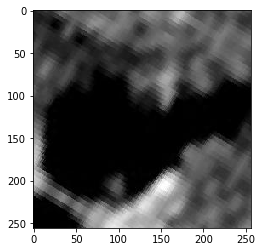

In [4]:

# 找到本地生成图，把9张图打印到同一张figure上
name_list = glob.glob(SAVE_PATH+'/*')
# for i in range(9):
# img = Image.open(name_list[0])
img = cv2.imread(name_list[8])
plt.imshow(img)
# for i in range(9):
#    img = Image.open(name_list[i])
#    sub_img = fig.add_subplot(331 + i)
#    sub_img.imshow(img)
# plt.show()